Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the Dataset

In [7]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

Viewing Data

In [69]:
print(df.head())

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  Week  Month Price_Range  
0         3              50           150    47     11        0-50  
1         2             500          1000     9      2      51-500  
2         1              30            30     2      1        0-50  
3         1             500           500    20      5      51-500  
4         2              50           100    18      5        0-50  


In [70]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Week              1000 non-null   UInt32        
 10  Month             1000 non-null   int32         
 11  Price_Range       1000 non-null   category      
dtypes: UInt32(1), category(1), datetime64[ns](1), int32(1), int64(5), object(3)
memory usage: 80.4+ KB
None


In [71]:
print(df.describe())

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount       Week        Month  
count     1000.000000   1000.000000     1000.0  1000.000000  
mean       179.890000    456.000000     26.632     6.549000  
min         25.000000     25.000000        1.0     1.000000  
25%         30.000000 

In [9]:
print(df[['Gender', 'Product Category']].head())
print(df.iloc[0:10])

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   
5               6  2023-04-25     CUST006  Female   45           Beauty   
6               7  2023-03-13     CUST007    Male   46         Clothing   
7               8  2023-02-22     CUST008    Male   30      Electronics   
8               9  2023-12-13     CUST009    Male   63      Electronics   
9              10  2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30 

Handling Missing Data

In [10]:
for col in df.columns:
    if df[col].dtype in ('float64', 'int64'):
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
if 'Price' in df.columns:
    df['Price_Normalized'] = (df['Price'] - df['Price'].min()) / (df['Price'].max() - df['Price'].min())


Grouping by Gender

In [12]:
print(df.groupby('Gender').size())

Gender
Female    510
Male      490
dtype: int64


Grouping by Product Category

In [13]:
print(df.groupby('Product Category').size())

Product Category
Beauty         307
Clothing       351
Electronics    342
dtype: int64


Grouping by Price Ranges

In [72]:
if 'Price' in df.columns:
    bins = [0, 50, 500, 1000, 5000, df['Price'].max()]
    labels = ['0-50', '51-500', '501-1000', '1001-5000', '5001+']
    df['Price_Range'] = pd.cut(df['Price per unit'], bins=bins, labels=labels, include_lowest=True)
    print(df.groupby('Price_Range').size())

Grouping by Age, Quantity & Total Amount

In [22]:
print(df.groupby('Age').agg({'Quantity': 'sum', 'Total Amount': 'sum'}))

     Quantity  Total Amount
Age                        
18         54         11215
19         57         14870
20         47          8645
21         50         12585
22         65         13700
23         57          8220
24         36          5415
25         46          9900
26         53         13980
27         60          9385
28         58          8670
29         42          6570
30         60          9790
31         60         10220
32         45          5550
33         26          6240
34         72         16785
35         64         11290
36         43          9105
37         47         11650
38         47         11100
39         45          4595
40         52          9415
41         42          5650
42         65          8500
43         89         17970
44         39          7560
45         37          6325
46         65         13090
47         72         12505
48         42          7240
49         50          5110
50         50          9845
51         84       

Grouping by Age, Item and Price


In [24]:
print(df.groupby('Age').agg({
    'Product Category': lambda x: x.mode()[0],
    'Price per Unit': 'mean'
}))

    Product Category  Price per Unit
Age                                 
18            Beauty      205.952381
19       Electronics      248.571429
20            Beauty      135.714286
21            Beauty      250.250000
22       Electronics      188.518519
23          Clothing      155.625000
24       Electronics      115.666667
25            Beauty      223.750000
26          Clothing      262.045455
27            Beauty      160.217391
28       Electronics      152.857143
29          Clothing      163.437500
30            Beauty      175.909091
31       Electronics      209.772727
32          Clothing      119.473684
33          Clothing      205.500000
34            Beauty      202.142857
35       Electronics      171.363636
36          Clothing      199.000000
37          Clothing      272.812500
38       Electronics      238.157895
39            Beauty      117.777778
40          Clothing      165.416667
41          Clothing      128.809524
42            Beauty      108.461538
4

Gender-wise Sales Classification


In [26]:
print(df.groupby('Gender')['Total Amount'].sum())

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


Cross Tabulation: Gender vs Price Range Sales Count

In [48]:
crosstab = pd.crosstab(df['Gender'], df['Price_Range'])
print(crosstab)

Price_Range  0-50  51-500
Gender                   
Female        305     205
Male          299     191


Average Sales by Gender and Product Category

In [54]:
avg_sales_gender_category = df.groupby(['Gender', 'Product Category'])['Total Amount'].mean().unstack()
print(avg_sales_gender_category)

Product Category      Beauty    Clothing  Electronics
Gender                                               
Female            450.783133  467.097701   451.382353
Male              487.127660  419.802260   466.104651


Total Sales by Product Category

In [66]:
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(sales_by_category)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [49]:
avg_price_qty = df.groupby('Product Category').agg({'Price per Unit':'mean', 'Quantity':'mean'})
print(avg_price_qty)

                  Price per Unit  Quantity
Product Category                          
Beauty                184.055375  2.511401
Clothing              174.287749  2.547009
Electronics           181.900585  2.482456


Top 5 Customers by Total Sales

In [59]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)
print(top_customers)

Customer ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
Name: Total Amount, dtype: int64


Count by Gender

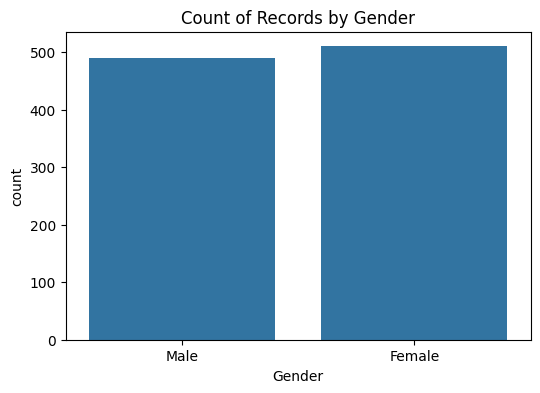

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title('Count of Records by Gender')
plt.show()

Price by Gender

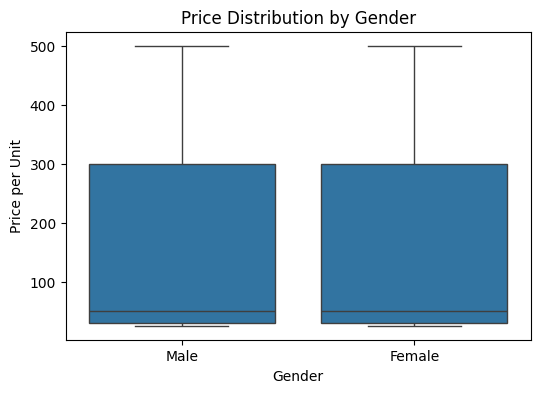

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Price per Unit', data=df)
plt.title('Price Distribution by Gender')
plt.show()

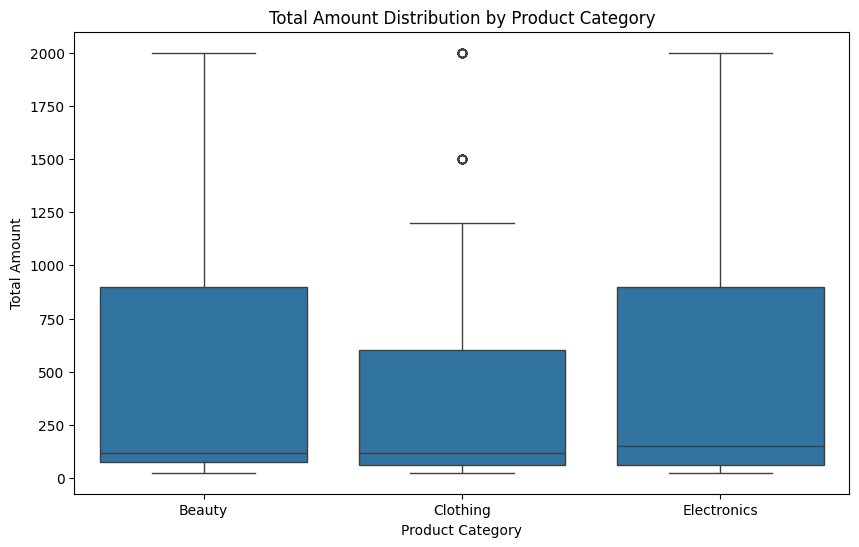

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Product Category', y='Total Amount')
plt.title('Total Amount Distribution by Product Category')
plt.show()

Product Category distribution

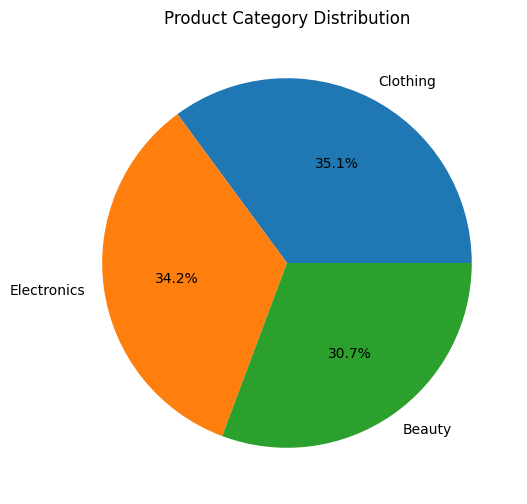

In [29]:
plt.figure(figsize=(6,6))
df['Product Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.ylabel('')
plt.show()

Monthly Sales Trend

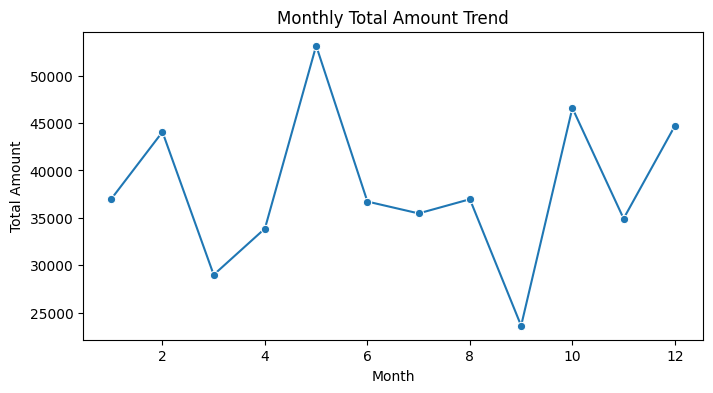

In [34]:
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', marker='o')
plt.title('Monthly Total Amount Trend')
plt.show()

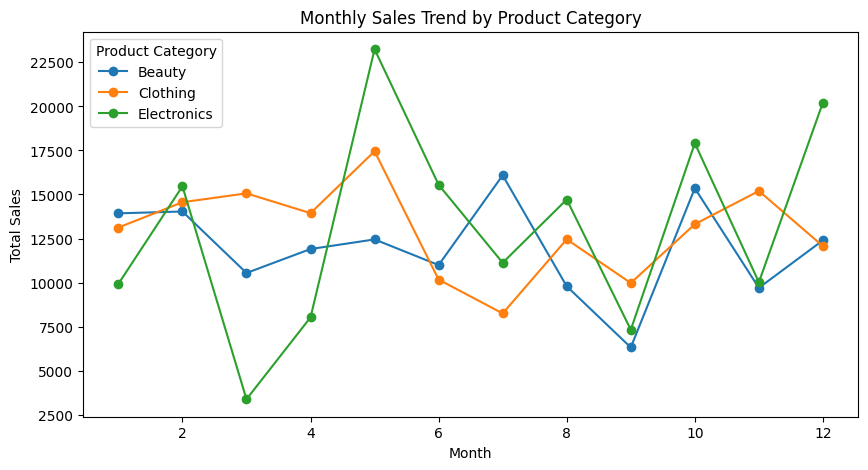

In [61]:
monthly_category_sales = df.groupby(['Month', 'Product Category'])['Total Amount'].sum().unstack()
monthly_category_sales.plot(figsize=(10,5), marker='o')
plt.title('Monthly Sales Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.show()

Age Group Distribution of Customers

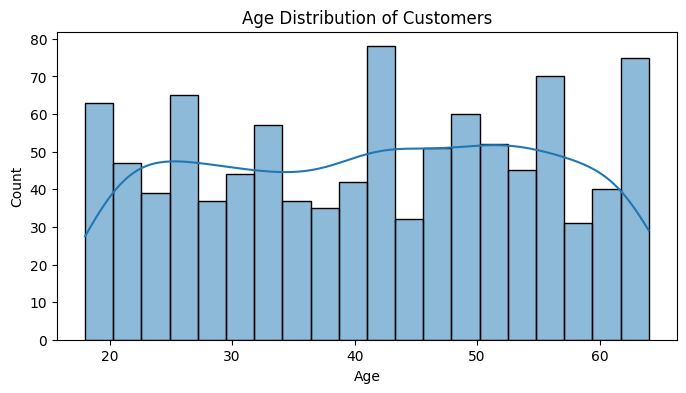

In [46]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.show()

Sales vs Quantity by Age

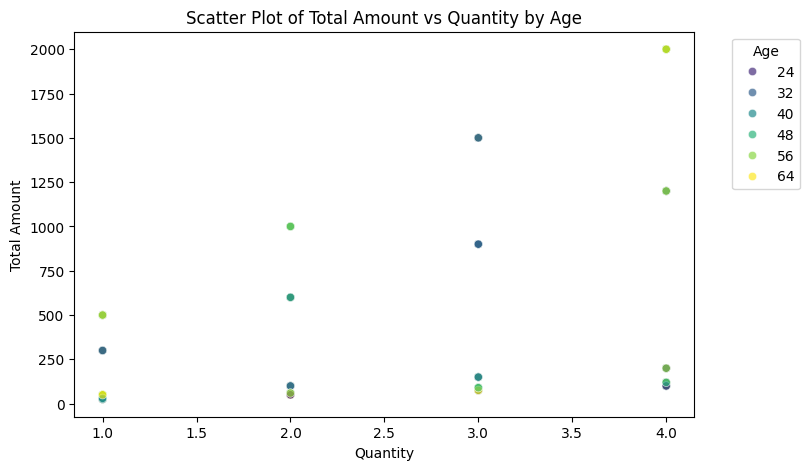

In [76]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Age', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Total Amount vs Quantity by Age')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Correlation Matrix of numeric columns

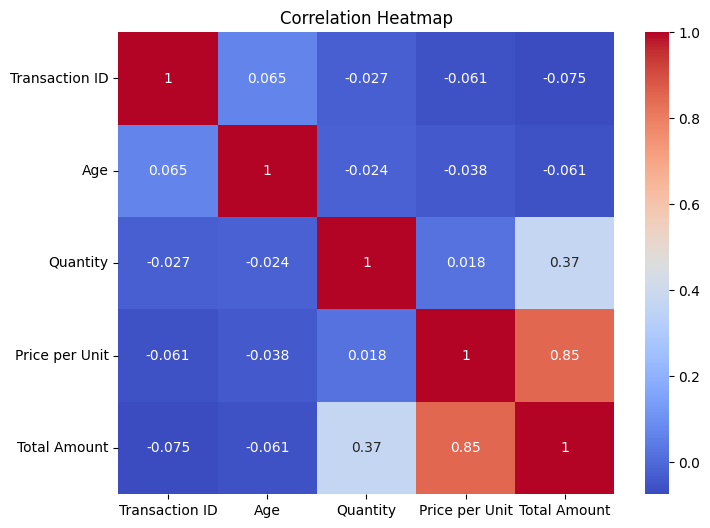

In [35]:
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()